# Analysis of FBI Firearm Background Check Data

Project Cheat Sheet:

https://classroom.udacity.com/nanodegrees/nd025-ent-shell/parts/ff0e5daa-8f0e-419a-a445-53e7f111b59f/modules/aaf8503f-e9ac-404b-b81b-82ca77ce7461/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/e1dfe986-ad5d-4669-b1f9-a89f92af7a50

Grading Criteria:

https://review.udacity.com/#!/rubrics/107/view


# Introduction

Notes on Data source here:

https://github.com/BuzzFeedNews/nics-firearm-background-checks

FBI publishes monthly data that is collected on the number of background checks processed by Federal Firearms Licensed dealers by state.  The big caveats are that not every background check results in a sale, and some checks represent multiple purchases.  There are also differences in how individual states report, and private party sales are not subject to the background check requirement.  However this is considered a rough proxy for the number of new firearm purchases in the United States.

In [2]:
#RUN ONCE
#Pull data from source:
#!git clone https://github.com/BuzzFeedNews/nics-firearm-background-checks.git

#GIT was smart enough to notice that I've cloned another repository into my own.  I don't know what the best practice is here, but this appears to work OK.

In [3]:
#Import Modules and Load Data
import pandas as pd
import os
import matplotlib as plt
import numpy as np
import matplotlib.dates as mdates
%matplotlib inline

print(os.getcwd())
os.chdir(r'D:\EPST\Predictive Maintenance\Udacity\Project1\nics-firearm-background-checks\data')

df = pd.read_csv('nics-firearm-background-checks.csv')


d:\EPST\Predictive Maintenance\Udacity\Project1


# Data Cleanup

The data are reported monthly, use the date column to index the dataframe.  Create a year column and a calendar month column for filtering later on.

In [4]:
#RUN ONCE
#Convert date column to datetime
df.month = pd.to_datetime(df['month'])

#Set & rename the index
df.index = df['month']
df.index.name = 'date'

#Add columns for year and calendar month
df.insert(1,'year',df.month.dt.year)
df.insert(2,'cal_month',df.month.dt.month)

#Convert State field to categorical
df.state = df.state.astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14080 entries, 2020-02-01 to 1998-11-01
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      14080 non-null  datetime64[ns]
 1   year                       14080 non-null  int64         
 2   cal_month                  14080 non-null  int64         
 3   state                      14080 non-null  category      
 4   permit                     14056 non-null  float64       
 5   permit_recheck             2695 non-null   float64       
 6   handgun                    14060 non-null  float64       
 7   long_gun                   14061 non-null  float64       
 8   other                      7095 non-null   float64       
 9   multiple                   14080 non-null  int64         
 10  admin                      14057 non-null  float64       
 11  prepawn_handgun            12137 non-null  float64

# Exploratory Data Analysis

The totals column has a value for every row - so, no need to delete any rows.  All columns have at least one entry, so no need to delete any columns.

In [4]:
df.sample(50)
df.head()

#There are 50 states + DC, Puerto Rico, Guam, US Virgin Islands, Mariana Islands
#Each state has 256 records => 55 * 256 = 14080 total records.
df['state'].value_counts(ascending=True,sort=False)


Alabama                 256
Alaska                  256
Arizona                 256
Arkansas                256
California              256
Colorado                256
Connecticut             256
Delaware                256
District of Columbia    256
Florida                 256
Georgia                 256
Guam                    256
Hawaii                  256
Idaho                   256
Illinois                256
Indiana                 256
Iowa                    256
Kansas                  256
Kentucky                256
Louisiana               256
Maine                   256
Mariana Islands         256
Maryland                256
Massachusetts           256
Michigan                256
Minnesota               256
Mississippi             256
Missouri                256
Montana                 256
Nebraska                256
Nevada                  256
New Hampshire           256
New Jersey              256
New Mexico              256
New York                256
North Carolina      

# Question
In 2019, which states had the fewest background checks? The most?

In [84]:
df[df['year']==2019].groupby('state').totals.sum().sort_values().head(5)


state
Mariana Islands           189
Virgin Islands           1544
Guam                     2397
District of Columbia     5926
Hawaii                  12666
Name: totals, dtype: int64

In [83]:
df[df['year']==2019].groupby('state').totals.sum().sort_values().tail(5)

state
California    1240632
Indiana       1450565
Texas         1487212
Kentucky      4120892
Illinois      4949570
Name: totals, dtype: int64

Text(0, 0.5, 'Total Number of background checks')

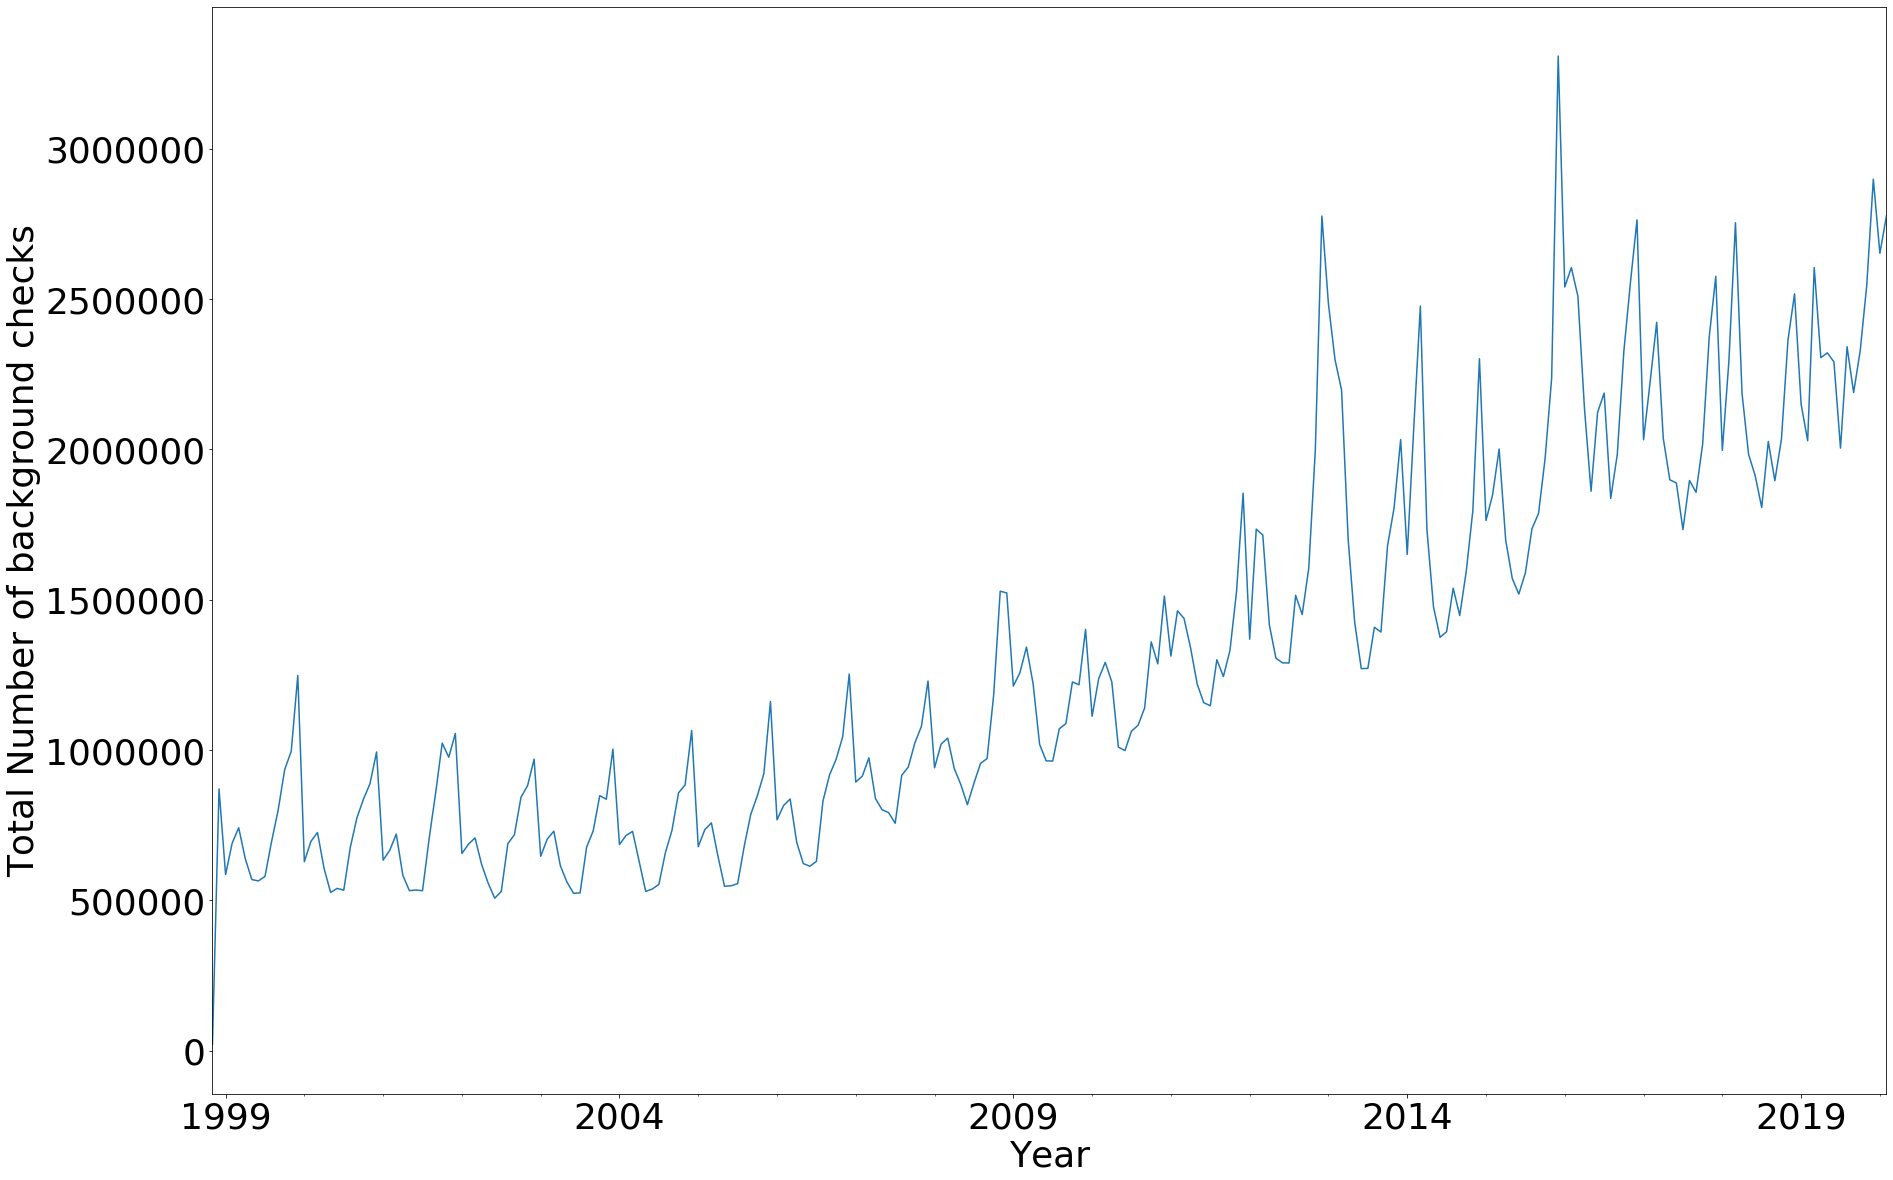

In [11]:
#Reproduce the graph provided on github page.
ax = df.groupby('month').totals.sum().plot(figsize=(30,20),fontsize=36);
ax.set_xlabel("Year",fontsize=36);
ax.set_ylabel("Total Number of background checks",fontsize=36)
#ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 1))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m-%Y'))
#Like to have more x-ticks here.  Not sure how.


In [47]:
#df.query('month==1')
#df.head()

#for each_year in list(df.year.unique()):
    #print(each_year)
    #df_annual = .append(df[df.year==each_year].groupby('month').totals.describe())
    
#df_annual = pd.DataFrame()
df_state = df.groupby(['state','year']).totals.describe();


#df_state[df_state['state']=='Alabama'].head()
    

,,count,mean,std,min,25%,50%,75%,max
state,year,,,,,,,,
Missouri,2000,12.0,15964.833333,4518.960175,10574.0,13201.50,15181.0,18001.75,23599.0
Hawaii,2006,12.0,632.333333,118.190396,464.0,538.75,642.5,698.50,858.0
Georgia,2012,12.0,38796.666667,14675.218247,27206.0,28602.50,34450.5,42265.25,78998.0
Nevada,2006,12.0,6080.250000,892.573819,5132.0,5453.25,5957.0,6290.50,8141.0
Kansas,2011,12.0,13741.500000,3696.952098,9557.0,11189.25,13091.0,15783.75,21656.0
Alaska,2009,12.0,5065.000000,755.600303,4227.0,4593.75,4881.5,5298.75,6724.0
Pennsylvania,1998,2.0,24158.500000,34141.236716,17.0,12087.75,24158.5,36229.25,48300.0
Hawaii,1998,2.0,215.500000,265.165043,28.0,121.75,215.5,309.25,403.0
Minnesota,1998,2.0,6058.000000,8116.171634,319.0,3188.50,6058.0,8927.50,11797.0


# QUESTION
What is the best time of year to shop for good deals on firearms?


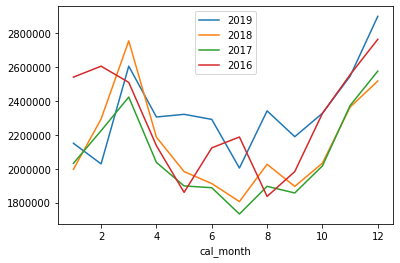

In [21]:
df[df.year==2019].groupby('cal_month').totals.sum().plot()
df[df.year==2018].groupby('cal_month').totals.sum().plot()
df[df.year==2017].groupby('cal_month').totals.sum().plot()
ax = df[df.year==2016].groupby('cal_month').totals.sum().plot()

ax.legend(['2019','2018','2017','2016']);

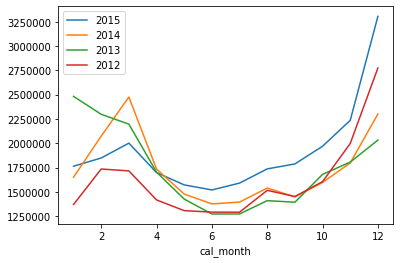

In [23]:
df[df.year==2015].groupby('cal_month').totals.sum().plot()
df[df.year==2014].groupby('cal_month').totals.sum().plot()
df[df.year==2013].groupby('cal_month').totals.sum().plot()
ax = df[df.year==2012].groupby('cal_month').totals.sum().plot()

ax.legend(['2015','2014','2013','2012']);

# ANSWER

If the number of background checks is considered a good indication of consumer demand, the best time to shop would be when consumer demand is low during the summer months.  Avoid purchases in December and March.  Appears June / July 2016 is an anomoly, possibly related to Presidential Election in November, or the Orlando Nightclub shooting on June 12.  Unlikely that the election was causal, because the trend did not continue in August / September.  Also, the spike in August 2019 appears correlated with the El Paso Walmart shooting on Aug. 3rd.

# QUESTION
Which states saw the largest year over year change in number of background?

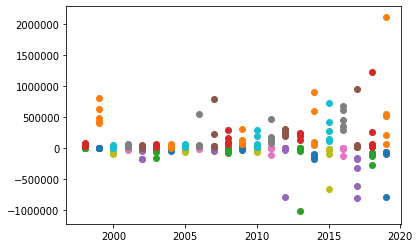

In [49]:
for each_year in list(df.year.unique()):
    #print(each_year)
    #let's skip 2020 because it's not finished yet.
    if each_year != 2020:
        df_delta = df[df['year']==each_year].groupby('state').totals.sum() - df[df['year']==each_year-1].groupby('state').totals.sum()
        plt.pyplot.scatter(x=np.repeat(each_year,5), y=df_delta.sort_values().head(5))
        plt.pyplot.scatter(x=np.repeat(each_year,5), y=df_delta.sort_values().tail(5))

# Investigate Outliers

In [57]:
df_2019 = df[df['year']==2019].groupby('state').totals.sum()
df_2018 = df[df['year']==2018].groupby('state').totals.sum()
df_2017 = df[df['year']==2017].groupby('state').totals.sum()
df_2016 = df[df['year']==2016].groupby('state').totals.sum()
df_2015 = df[df['year']==2015].groupby('state').totals.sum()

delta_1 = df_2019 - df_2018
delta_2 = df_2018 - df_2017
delta_3 = df_2017 - df_2016
delta_4 = df_2016 - df_2015

print('\033[1m')
print('2018 to 2019')
print('\033[0m')
print(delta_1.sort_values().head(5))
print(delta_1.sort_values().tail(5))

print('\033[1m')
print('2017 to 2018')
print('\033[0m')
print(delta_2.sort_values().head(5))
print(delta_2.sort_values().tail(5))

print('\033[1m')
print('2016 to 2017')
print('\033[0m')
print(delta_3.sort_values().head(5))
print(delta_3.sort_values().tail(5))

print('\033[1m')
print('2015 to 2016')
print('\033[0m')
print(delta_4.sort_values().head(5))
print(delta_4.sort_values().tail(5))





2018 to 2019

state
Kentucky     -791549
Texas         -84420
Ohio          -78980
Tennessee     -58788
California    -56500
Name: totals, dtype: int64
state
Minnesota      78278
Alabama       215790
Utah          527412
Indiana       554417
Illinois     2118123
Name: totals, dtype: int64

2017 to 2018

state
California       -272978
South Carolina   -116171
Minnesota         -79466
Wisconsin         -74003
Tennessee         -73852
Name: totals, dtype: int64
state
Iowa            28178
Washington      47623
Indiana         65791
Kentucky       270961
Illinois      1230360
Name: totals, dtype: int64

2016 to 2017

state
California   -807057
Indiana      -606368
Illinois     -322983
Texas        -172292
Florida      -158791
Name: totals, dtype: int64
state
Oregon        16459
Idaho         25756
Minnesota     31945
Tennessee     53179
Kentucky     964633
Name: totals, dtype: int64

2015 to 2016

state
Alabama           -120562
West Virginia       -6664
Virgin Islands       -255
Puerto R

2018-2019 had big outliers on both sides.  Large jump in Illinois and a big drop in Kentucky.

2017-2018 had an outlier up - Illinois again.  But California wasn't too far out of line with others.

2016-2017 Saw Kentucky come back in a big way, and California again led the pack in declines.

2015-2016 Alabama lead the way in declining applications which is a bit surprising, and Illinois again was the biggest increase.

# QUESTION
Are there differences in the number of long gun and short gun background checks?


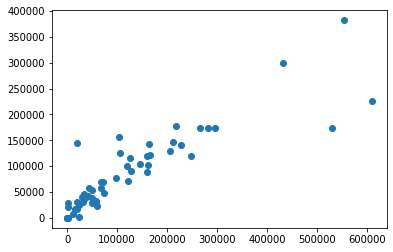

In [94]:
df_short = df[df['year']==2019].groupby('state').handgun.sum()
df_long = df[df['year']==2019].groupby('state').long_gun.sum()

plt.pyplot.scatter(x=df_short,y=df_long);

# ANSWER
Not really.  For the most part there is a positive linear correlation.  There are a couple of states that are outliers but that could be just due to differences in reporting methods.